**© 2023 Scott A. Bruce. Do not distribute.**

# Data analytics with pandas and NumPy

This notebook follows Chapter 10 in the Python Workshop textbook.  Herein, we will use the `NumPy` and `pandas` packages for data analysis in Python.  Taken together, pandas and NumPy are masterful at handling big data. They are built for speed, efficiency, readability, and ease of use.

**Pandas** provide you with a unique framework to view and modify data. Pandas handles all data-related tasks such as creating DataFrames, importing data, scraping data from the web, merging data, pivoting, concatenating, and more.

**NumPy**, short for Numerical Python, is more focused on computation. NumPy interprets the rows and columns of pandas DataFrames as matrices in the form of NumPy arrays. When computing descriptive statistics such as the mean, median, mode, and quartiles, NumPy is blazingly fast.

## 1. NumPy and basic stats

NumPy is designed to handle big data swiftly. It includes the following essential components according to the NumPy documentation: 

- A powerful n-dimensional array object 
- Sophisticated (broadcasting) functions 
- Tools for integrating C/C++ and Fortran code 
- Useful linear algebra, Fourier transform, and random number capabilities 

From NumPy documentation: The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

Going forward, instead of using lists, you will use NumPy arrays. NumPy arrays are the basic elements of the NumPy package. NumPy arrays are designed to handle arrays of any dimension. 

Numpy arrays can be indexed easily and can have many types of data, such as float, int, string, and object, but the **types must be consistent** to improve speed.


### 1.1 Exercise 128: Converting Lists to NumPy Arrays

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
test_scores = [70,65,95,88]
type(test_scores)

**Note** Now that numpy has been imported, you can access all numpy methods, such as numpy arrays. Type `np.` + Tab on your keyboard to see the breadth of options. You are looking for an array.

In [ ]:
scores = np.array(test_scores)
type(scores)

### 1.2 Exercises 129-131: Summary statistics

In [ ]:
scores.mean()

In [ ]:
income = np.array([75000, 55000, 88000, 125000, 64000, 97000])
income.mean()

In [ ]:
income = np.append(income, 12000000)
income.mean()

In [ ]:
np.median(income)

**Note** Median here is not a method of `np.array`, but it is a method of `numpy`. (The mean may be computed in the same way, as a method of numpy.)


In [ ]:
np.mean(income)

In [ ]:
income.std()
scores.std()

In [ ]:
scores.max()
scores.min()
scores.sum()

## 2. Matrices

A DataFrame is generally composed of rows, and each row has the same number of columns. From one point of view, it's a two-dimensional grid containing lots of numbers. It can also be interpreted as a list of lists, or an array of arrays.

NumPy has methods for creating matrices or n-dimensional arrays. One option is to place random numbers between 0 and 1 into each entry, as follows.

### 2.1 Exercise 132: Matrices

In [ ]:
np.random.seed(seed=60) 
np.random.rand
random_square = np.random.rand(5,5) 
random_square


zero_square = np.zeros((5,5))
zero_square

In [ ]:
x=np.empty((5,5))

**Note** The `np.random.seed()` ensures that the same collection of random numbers are drawn every time, which is important for reproducibility.  You can set your own seed.

In [ ]:
random_square = np.random.rand(5,5) 
random_square
random_square = np.random.rand(5,5) 
random_square

In [ ]:
np.random.seed(seed=60) 
random_square = np.random.rand(5,5) 
random_square
np.random.seed(seed=60) 
random_square = np.random.rand(5,5) 
random_square

In [ ]:
#Indexing, slicing, and accessing

#First row
random_square[0]
random_square[0,:]

#First column
random_square[:,0]

#First entry
random_square[0,0]
random_square[0][0]

#Third row, fourth column
random_square[2,3]

#Multiple rows and columns
random_square[0:2,:]
random_square[:,3:5]
random_square[[0,3,4],:]

In [ ]:
#Matrix mean
random_square.mean()

#First row mean
random_square[0].mean()

#Last column mean
random_square[:,-1].mean()

### 2.2 Computation time for large matrices

Now that you have gotten a hang of creating random matrices, you can see how long it takes to generate a large matrix and compute the mean:

In [ ]:
%%time 
np.random.seed(seed=60) 
big_matrix = np.random.rand(100000, 100)

In [ ]:
%%time 
np.random.seed(seed=60) 
big_matrix = np.random.rand(100000, 100)
big_matrix.mean()

In the next exercise, you will create arrays using NumPy and compute various values through them. One such computation you will be using is `ndarray.numpy.ndarray` is a (usually fixed-size) multidimensional array container of items of the same type and size.

### 2.3 Exercise 133: Creating an array to implement NumPy computations

In [ ]:
# np.arange returns evenly spaced values 
# within a given interval.

np.arange(1,101,2)

In [ ]:
#reshape to 20 rows and 5 cols
np.arange(1, 101).reshape(20,5)

**Note** `.reshape` fills the new matrix by rows (not by columns)

In [ ]:
#matrix computations
mat1 = np.arange(1, 101).reshape(20,5) 
mat1 - 50
mat1*10
mat1+mat1
mat1*mat1
np.dot(mat1, mat1.T) #dot product of two arrays (for 2-d arrays, is same as matrix multiplication)
np.matmul(mat1,mat1.T) #matrix multiplication

In [ ]:
mat2 = np.random.rand(5, 5)
np.linalg.inv(mat2)

In [ ]:
#dimension-specific computations
mat3=np.arange(1, 13).reshape(3,4)
mat3

np.sum(mat3,axis=0) #column means
np.mean(mat3,axis=1) #row means

np.std(mat3,axis=0) #column std
np.std(mat3,axis=1) #row std

#multi-dimensional
mat4=np.arange(1, 13).reshape(2,2,3)
mat4

np.mean(mat4,axis=0) 
np.mean(mat4,axis=1)
np.mean(mat4,axis=2) 
np.mean(mat4,axis=(0,1))

## 3. The pandas library

Pandas is the Python library that handles data on all fronts. Pandas can import data, read data, and display data in an object called a `DataFrame`. A DataFrame consists of rows and columns. One way to get a feel for DataFrames is to create one.

### 3.1 Exercise 134: Using DataFrames to Manipulate Stored Student testscore Data

In this exercise, you will create a dictionary, which is one of many ways to create a pandas DataFrame. You will then manipulate this data as required.

In [ ]:
# create dictionary of test scores
test_dict = {'Corey':[63,75,88], 
             'Kevin':[48,98,92], 
             'Akshay': [87, 86, 85]}
print(test_dict)

# create dataframe
df = pd.DataFrame(test_dict)
df

You can inspect the DataFrame: 

 - First, each dictionary key is listed as a column. 
 - Second, the rows are labeled with indices starting with 0 by default. 
 - Third, the visual layout is clear and legible. Each column of a DataFrame is officially represented as a Series. A series is a one-dimensional ndarray. 
 
 Now, you will rotate the DataFrame, which is also known as a transpose, a standard `pandas` method. A transpose turns rows into columns and columns into rows.

In [ ]:
df = df.T
df

### 3.2 Exercise 135: DataFrame Computations with the Student testscore Data

In [ ]:
df.columns = ['Quiz_1', 'Quiz_2', 'Quiz_3'] 
df

Now, select a range of values from specific rows and columns. You will be using .iloc with the index number, which is a function present in a pandas DataFrame for selection. This is shown in the following step:

In [ ]:
#access first row by index number
df.iloc[0]
df.iloc[:,0]

In [ ]:
#access column by name
df['Quiz_1']
df.Quiz_1

### 3.3 Exercise 136: Computing DataFrames within DataFrames

In [ ]:
# Defining a new DataFrame from first 2 rows and last 2 columns 
rows = ['Corey', 'Kevin'] 
cols = ['Quiz_2', 'Quiz_3'] 
df_spring = df.loc[rows, cols] 
df_spring

In [ ]:
# Select first 2 rows and last 2 columns using index numbers 
df.iloc[[0,1], [1,2]] 

Now, add a new column to find the quiz average of our students. You can generate new columns in a variety of ways. One way is to use available methods such as the mean. In pandas, it's important to specify the axis. An axis of 0 represents the columns, and an axis of 1 represents the rows.

In [ ]:
# Define new column as mean of other columns 
df['Quiz_Avg'] = df.mean(axis=1) 
df

In [ ]:
# Create a new column as a list
df['Quiz_4'] = [92, 95, 88]
df

In [ ]:
# Delete column
del df['Quiz_Avg']
df

In the next section, you will be looking at new rows and NaN, which is an official NumPy term.

### 3.4 New rows and NaN

It's not easy to add new rows to a pandas DataFrame. A common strategy is to generate a new DataFrame and then to concatenate the values. Say you have a new student who joins the class for the fourth quiz. What values should you put for the other three quizzes? The answer is NaN. It stands for Not a Number. NaN is an official NumPy term. It can be accessed using np.NaN. It is case-sensitive. In later exercises, you will look at how NaN can be used. In the next exercise, you will look at concatenating and working with null values.

Much more can be said on this.  **For more details**, see 
 - https://pandas.pydata.org/pandas-docs/dev/user_guide/gotchas.html#nan-integer-na-values-and-na-type-promotions
 - https://pandas.pydata.org/docs/user_guide/missing_data.html
 - https://stackoverflow.com/questions/60115806/pd-na-vs-np-nan-for-pandas

### 3.5 Exercise 137: Concatenating and Finding the Mean with Null Values for Our testscore Data



In [ ]:
# Create new DataFrame of one row 
df_new = pd.DataFrame({'Quiz_1':[np.NaN], 'Quiz_2':[np.NaN], 'Quiz_3': [np.NaN], 'Quiz_4':[71]}, index=['Adrian'])

# Concatenate DataFrames 
df = pd.concat([df, df_new])

df

In [ ]:
df['Quiz_Avg'] = df.mean(axis=1, skipna=True)
df

Notice that all values are floats except for **Quiz_4**. There will be occasions when you need to cast all values in a particular column as another type.

### 3.6 Casting column types

In [ ]:
df.Quiz_4.astype(float)
df['Quiz_4'] = df.Quiz_4.astype(float)
df

## 4. Data

Now that you have been introduced to NumPy and pandas, you will use them to analyze some real data. Data scientists analyze data that exists in the cloud or online. One strategy is to download data directly to your computer.
 
 
It is recommended to create a new folder to store all of your data. You can open your Jupyter Notebook in this same folder.

### 4.1 Downloading data

Data comes in many formats, and pandas is equipped to handle most of them. In general, when looking for data to analyze, it's worth searching the keyword "dataset." A dataset is a collection of data. Online, "data" is everywhere, whereas datasets contain data in its raw format. You will start by examining the famous Boston Housing dataset from 1980, which is available on our GitHub repository. This dataset can be found here https://packt.live/31Cd96j. You can begin by first downloading the dataset onto our system.

### 4.2 Reading data

Here is a list of standard data files that pandas will read, along with the code for reading data:

- csv files: `pd.read_csv('file_name')`
- excel files: `pd.read_excel('file_name')`
- feather files: `pd.read_feather('file_name')`
- html files: `pd.read_html('file_name')`
- json files: `pd.read_json('file_name')`
- sql database: `pd.read_sql('file_name')`

If the files are clean, pandas will read them properly. Sometimes, files are not clean, and changing function parameters may be required. It's advisable to copy any errors and search for solutions online. A further point of consideration is that the data should be read into a DataFrame. Pandas will convert the data into a DataFrame upon reading it, but you need to save DataFrame as a variable.

### 4.3 Exercise 138: Reading and viewing the Boston Housing dataset

In [ ]:
housing_df = pd.read_csv('HousingData.csv')
housing_df.head()

Data description: 

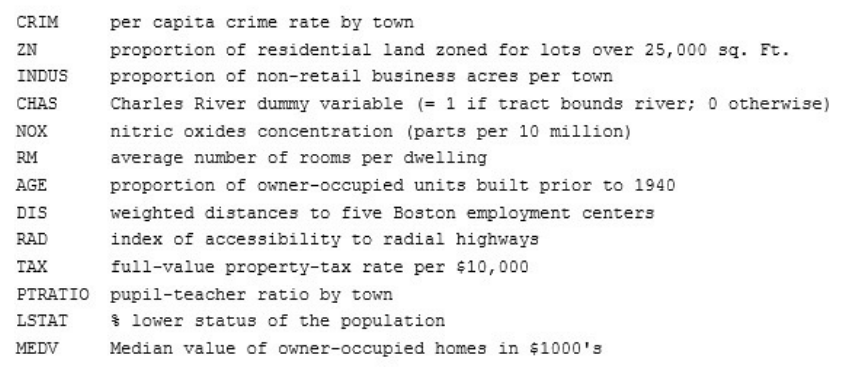

### 4.4 Exercise 139: Gaining data insights from the Boston Housing dataset

In [ ]:
housing_df.describe()

In [ ]:
housing_df.info()

In [ ]:
housing_df.shape

This confirms that you have 506 rows and 14 columns. Notice that shape does not have any parentheses after it. This is because it's technically an attribute and pre-computed.

### 4.5 Null values

You need to do something about the null values. There are several popular choices when dealing with null values: 

- Eliminate the rows: Can work if null values are a very small percentage, such as 1% of the total dataset. 
- Replace missing values with the mean/median/mode and add a missing indicator (for use in downstream modeling efforts)
- Impute missing values: Depends on the reason for missingness.  Can use other fields to impute missing values in a given field if it is reasonable to assume that missingness can be "explained" by other **observed** values.  This is not always the case.


### 4.6 Exercise 140: Null value operations on a dataset

In [ ]:
housing_df.isnull()

In [ ]:
housing_df.isnull().any()

In [ ]:
housing_df.loc[:, housing_df.isnull().any()].describe()

Breakdown of the above code:
- `housing_df` is the DataFrame. 
- `.loc` allows you to specify rows and columns. 
- `:` selects all rows. 
- `housing_df.isnull().any()` selects only columns with null values.
- `.describe()` pulls up the statistics.

### 4.7 Replacing null values

Pandas include a nice method, `fillna`, which can be used to replace null values. It works for individual columns and entire DataFrames. You will use three approaches, 

- replacing the null values of a column with the mean
- replacing the null values of a column with another value
- replacing all the null values in the entire dataset with the median. 

In [ ]:
# replacing with the mean
housing_df['AGE'] = housing_df['AGE'].fillna(housing_df.mean())

# replacing with another value
housing_df['CHAS'] = housing_df['CHAS'].fillna(0)

# replacing with median
housing_df = housing_df.fillna(housing_df.median())

housing_df.info()

After eliminating all null values, the dataset is much cleaner. There may also be unrealistic outliers or extreme outliers that will lead to poor prediction. These can often be detected through visual analysis, which you will be covering in the next section.

## 5. Visualization (but faster this time)

In [ ]:
# Set up seaborn dark grid
sns.set()

In [ ]:
plt.hist(housing_df['MEDV'])
plt.show()

In [ ]:
plt.hist(housing_df['MEDV'])
plt.title('Median Boston Housing Prices')
plt.xlabel('1980 Median Value in Thousands')
plt.ylabel('Count')
plt.show()

In [ ]:
title = 'Median Boston Housing Prices'
plt.figure(figsize=(10,6))
plt.hist(housing_df['MEDV'])
plt.title(title, fontsize=15)
plt.xlabel('1980 Median Value in Thousands')
plt.ylabel('Count')
plt.savefig(title, dpi=300)
plt.show()

In [ ]:
x = housing_df['RM']
y = housing_df['MEDV']
plt.scatter(x, y)
plt.show()

In [ ]:
housing_df.corr()

In [ ]:
corr = housing_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, xticklabels=corr.columns.values,
yticklabels=corr.columns.values, cmap="Blues", linewidths=1.25, alpha=0.8)
plt.show()

In [ ]:
x = housing_df['RM']
y = housing_df['MEDV']
plt.boxplot(x)
plt.show()

In [ ]:
plt.violinplot(x) 
plt.show() 

In [ ]:
plt.figure(figsize=(10, 7)) 
sns.regplot(x='RM',y='MEDV',data=housing_df) 
plt.show() 

In [ ]:
x = housing_df['RM']
y = housing_df['MEDV']
X = sm.add_constant(x) 
model = sm.OLS(y, X) 
est = model.fit() 
print(est.summary())

You began our introduction to data analysis with **NumPy**, Python's incredibly fast library for handling massive matrix computations. Next, you learned about the fundamentals of **pandas**, Python's library for handling DataFrames. Taken together, you used NumPy and pandas to analyze the Boston Housing dataset, which included descriptive statistical methods and Matplotlib and Seaborn's graphical libraries. You also learned about advanced methods for creating clean, clearly labeled, publishable graphs.

# Example: Broadcasting is not always faster

From https://numpy.org/doc/stable/user/basics.broadcasting.html

"Broadcasting is a powerful tool for writing short and usually intuitive code that does its computations very efficiently in C. However, there are cases when broadcasting uses unnecessarily large amounts of memory for a particular algorithm. In these cases, it is better to write the algorithm’s outer loop in Python. This may also produce more readable code, as algorithms that use broadcasting tend to become more difficult to interpret as the number of dimensions in the broadcast increases."

See the following example and explanation from https://stackoverflow.com/questions/49632993/why-python-broadcasting-in-the-example-below-is-slower-than-a-simple-loop.
 

In [ ]:
#function to take squared some of rows after row-wise subtraction

def norm_loop(M, v):
  n = M.shape[0]
  d = np.zeros(n)
  for i in range(n):
    d[i] = np.sum((M[i] - v)**2)
  return d

def norm_bcast(M, v):
     return np.sum((M - v)**2, axis=1)

#broadcasting is better in this instance for smaller datasets
M = np.random.random_sample((10, 100))
v = M[0]
%timeit norm_loop(M, v) 
%timeit norm_bcast(M, v)

#bigger datasets tell a different story
M = np.random.random_sample((1000, 10000))
v = M[0]
%timeit norm_loop(M, v) 
%timeit norm_bcast(M, v)

What gives? It comes down to **memory access**. 

In the broadcast version, every element of `M` is subtracted from `v`. By the time the last row of `M` is processed, the results of processing the first row have been evicted from cache, so for the second step, these differences are again loaded into cache memory and squared. Finally, they are loaded and processed a third time for the summation. Since `M` is quite large, parts of the cache are cleared on each step to accommodate all of the data.

In the looped version, each row is processed completely in one smaller step, leading to fewer cache misses (i.e. inability to retreive needed data from cache because it has been cleared and needs to be reloaded) and overall faster code.